# Clustering playlists by re-ordered counts of track-level features 

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.manifold import TSNE
from sklearn import preprocessing
from util.util_data import *

np.set_printoptions(suppress=True)

In [10]:
def save_obj_curr_folder(obj, name):
    with open(name, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj_curr_folder(name):
    with open(name, 'rb') as f:
        return pickle.load(f)

In [11]:
pl_X_dict = load_json_to_dict('data_pl_dzrmeta/pl_X_dict.json')
pl_Y_title_dict = load_json_to_dict('data_pl_dzrmeta/pl_Y_title_dict.json')

pl_X_list = load_txt_to_list('data_pl_dzrmeta/pl_X_list.txt')
pl_key_to_id_dict = load_json_to_dict('data_pl_dzrmeta/pl_key_to_id_dict.json')


In [12]:
pl_X = []
for _item in pl_X_list:
    pl_X.append(eval(_item))

In [14]:
pl_X = np.array(pl_X)

## 404 dim : Count vector (388) + entropy vector (12) + playlist feature (4)


In [15]:
pl_X.shape

(137247, 404)

In [ ]:
std_pl_X = preprocessing.scale(pl_X, axis=0)  # standardization

In [17]:
A = std_pl_X
interia_ls = []
for k in range (1, 10):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(A)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_

    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    interia_ls.append(interia)
    print("k:",k, " distance to closest centroid:", interia)


k: 1  distance to closest centroid: 19351827.000000738
k: 2  distance to closest centroid: 17752295.27159977
k: 3  distance to closest centroid: 16654055.952327007
k: 4  distance to closest centroid: 15851734.791457564
k: 5  distance to closest centroid: 15216244.511560608
k: 6  distance to closest centroid: 14741762.81718254
k: 7  distance to closest centroid: 14260084.655223215
k: 8  distance to closest centroid: 13996587.055190986
k: 9  distance to closest centroid: 13707831.612904811


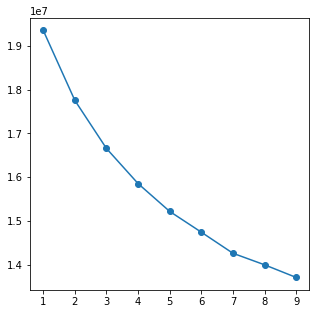

In [18]:
plt.figure(figsize=(5,5))
plt.scatter(range(1, 10), interia_ls);
plt.plot(range(1, 10), interia_ls);

## 388 dim : Only count vector features 

In [19]:
pl_X_ent = pl_X[:, :-16]

std_pl_X_ent = preprocessing.scale(pl_X_ent, axis=0) 

In [20]:
std_pl_X_ent.shape

(137247, 388)

In [21]:
# A = std_pl_X_ent
A = pl_X_ent
interia_ls = []
for k in range (1, 10):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(A)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_

    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    interia_ls.append(interia)
    print("k:",k, " distance to closest centroid:", interia)


k: 1  distance to closest centroid: 227402.3837403076
k: 2  distance to closest centroid: 183026.63510685612
k: 3  distance to closest centroid: 152754.6963393438
k: 4  distance to closest centroid: 140997.70053098947
k: 5  distance to closest centroid: 132793.6453828494
k: 6  distance to closest centroid: 125074.96398987636
k: 7  distance to closest centroid: 118786.25969500584
k: 8  distance to closest centroid: 114250.05953051057
k: 9  distance to closest centroid: 109878.5248072044


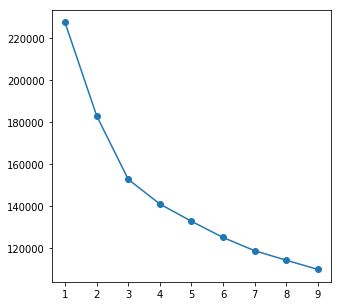

In [23]:
plt.figure(figsize=(5,5))
plt.scatter(range(1, 10), interia_ls);
plt.plot(range(1, 10), interia_ls);

In [24]:
kmeans = KMeans(n_clusters=7)
# kmeans.fit(std_pl_X_ent)
# y_kmeans_ent = kmeans.predict(std_pl_X_ent)
kmeans.fit(pl_X_ent)
y_kmeans_ent = kmeans.predict(pl_X_ent)

In [25]:
centers_ent = kmeans.cluster_centers_

In [26]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_pl_X_ent = tsne.fit_transform(pl_X_ent)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 137247 samples in 7.782s...
[t-SNE] Computed neighbors for 137247 samples in 3351.957s...
[t-SNE] Computed conditional probabilities for sample 1000 / 137247
[t-SNE] Computed conditional probabilities for sample 2000 / 137247
[t-SNE] Computed conditional probabilities for sample 3000 / 137247
[t-SNE] Computed conditional probabilities for sample 4000 / 137247
[t-SNE] Computed conditional probabilities for sample 5000 / 137247
[t-SNE] Computed conditional probabilities for sample 6000 / 137247
[t-SNE] Computed conditional probabilities for sample 7000 / 137247
[t-SNE] Computed conditional probabilities for sample 8000 / 137247
[t-SNE] Computed conditional probabilities for sample 9000 / 137247
[t-SNE] Computed conditional probabilities for sample 10000 / 137247
[t-SNE] Computed conditional probabilities for sample 11000 / 137247
[t-SNE] Computed conditional probabilities for sample 12000 / 137247
[t-SNE] Computed conditional pro

[t-SNE] Computed conditional probabilities for sample 136000 / 137247
[t-SNE] Computed conditional probabilities for sample 137000 / 137247
[t-SNE] Computed conditional probabilities for sample 137247 / 137247
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.676750
[t-SNE] Error after 300 iterations: 5.045705


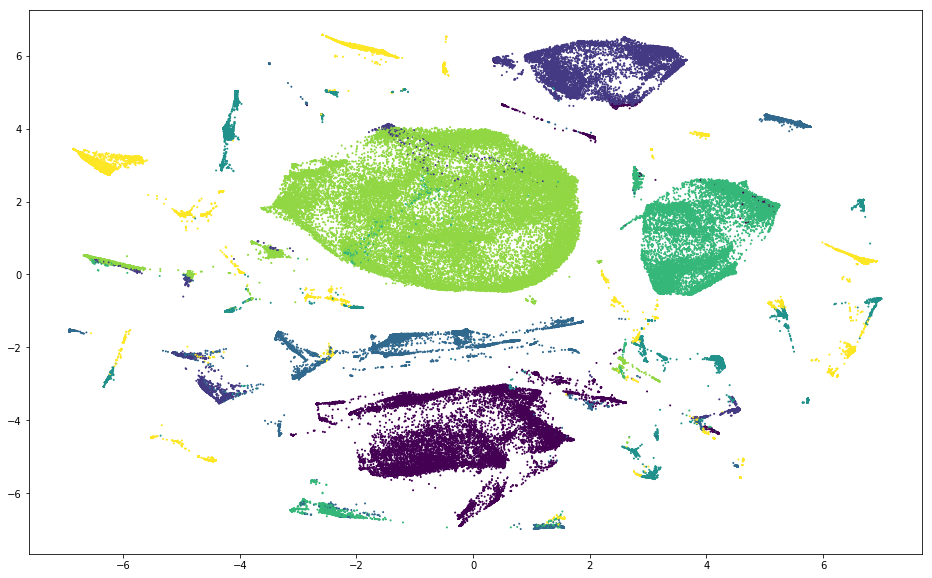

In [27]:
plt.figure(figsize=(16,10))
plt.scatter(tsne_pl_X_ent[:, 0], tsne_pl_X_ent[:, 1], c=y_kmeans_ent, s=1, cmap='viridis')

In [28]:
centers_ent.shape

(7, 388)

In [59]:
_terms = [28,10,209,17,25,58,6,8,5,12,7,3]
_cates = ['category', 
         'decade', 
         'genre', 
         'instrument',
         'lang',
         'location',
         'location:continent',
         'mood',
         'mood:activity',
         'mood:emotion',
         'mood:situation',
         'singer_type'
         ]


In [60]:
len(_terms), len(_cates)

(12, 12)

In [63]:
_feature_name_list = []
for _i in range(len(_terms)):
    _feature_name_list.append(_cates[_i])
    for _j in range(_terms[_i]-1):
        _feature_name_list.append('')

In [64]:
len(_feature_name_list)

388

## Checking out the centroids

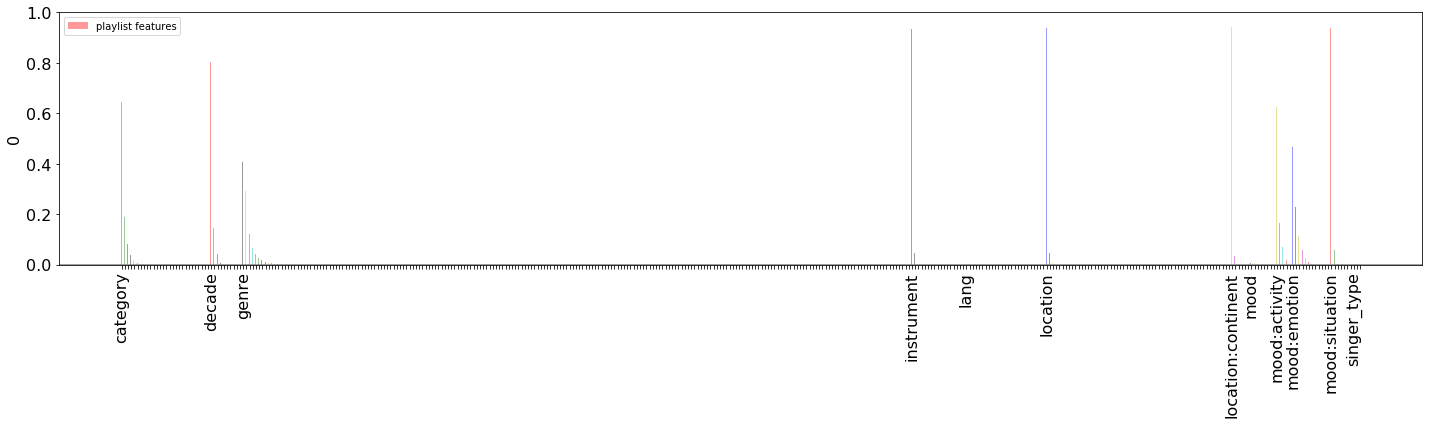

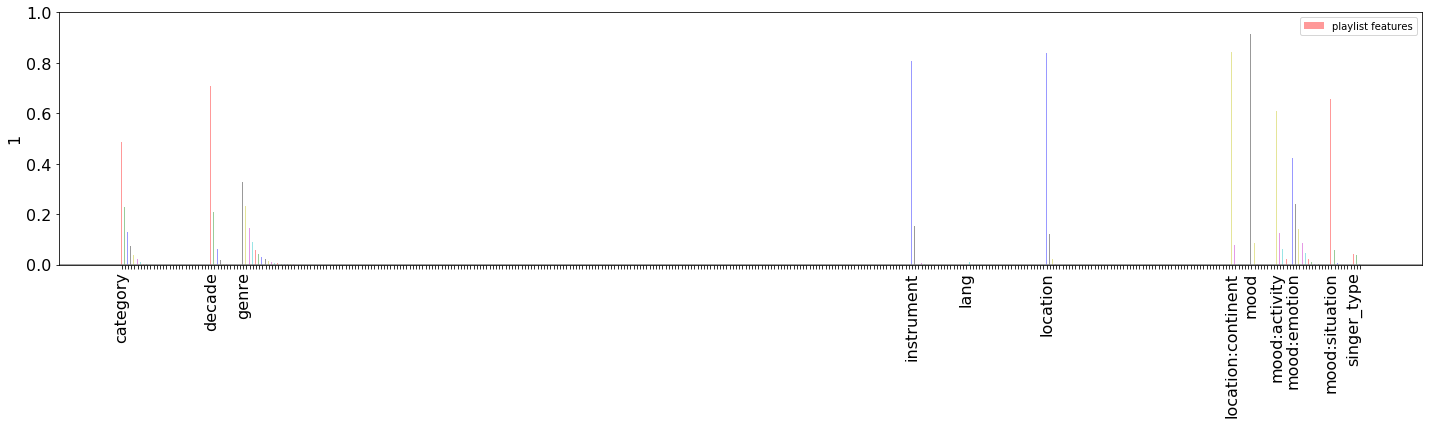

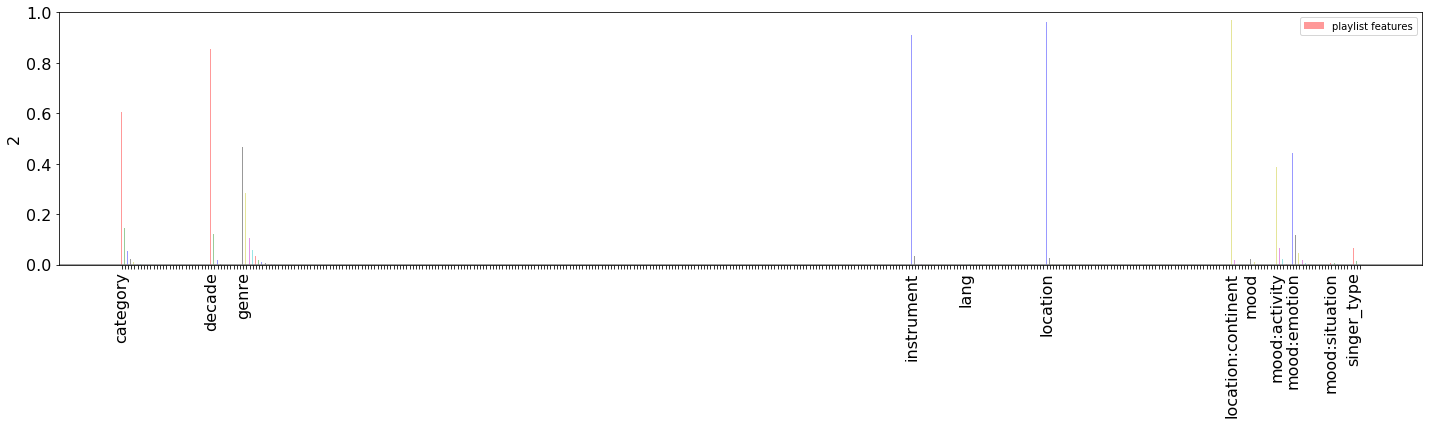

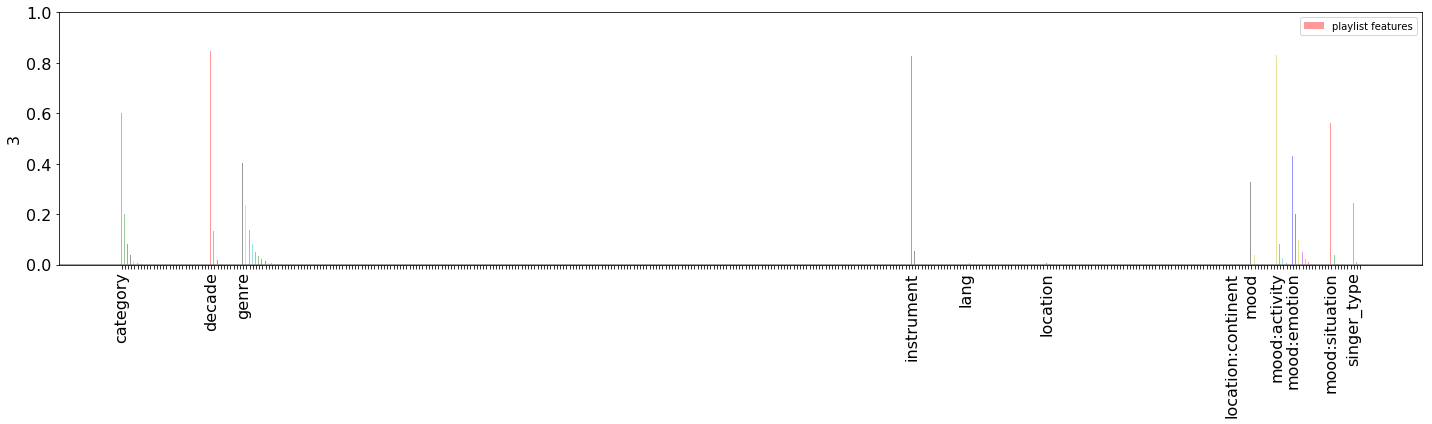

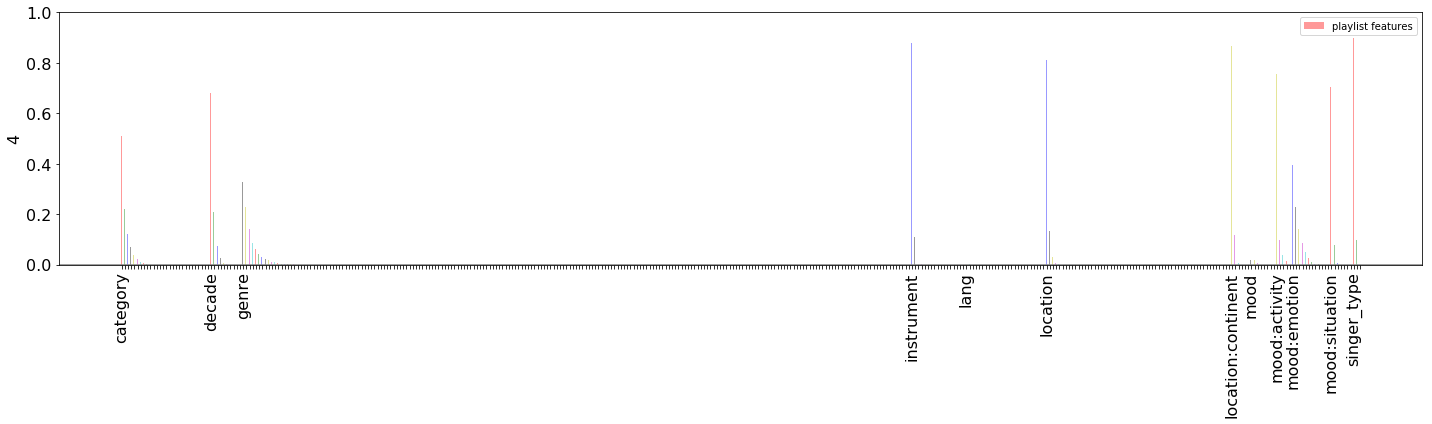

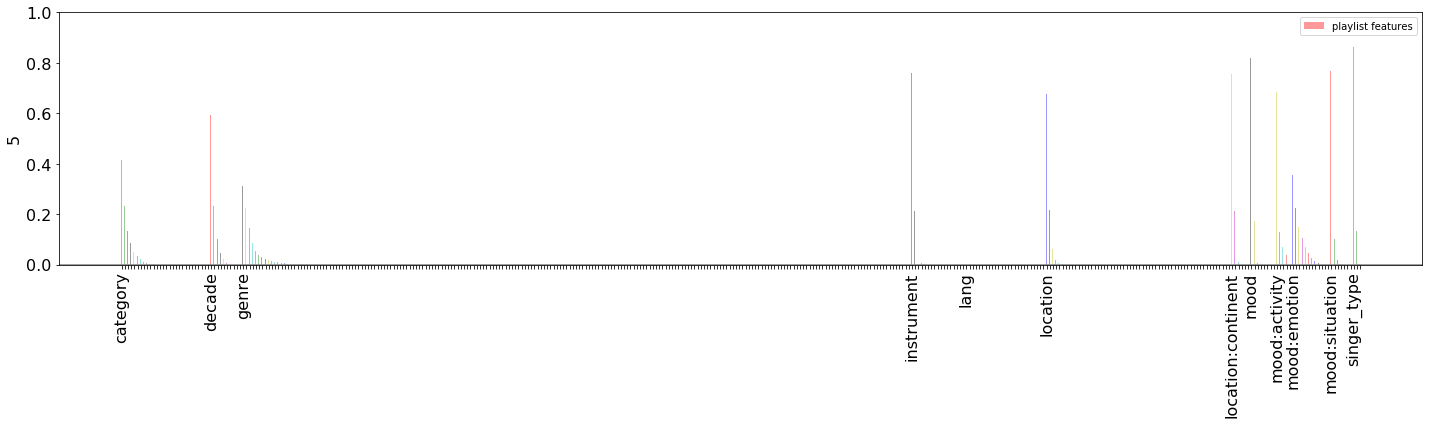

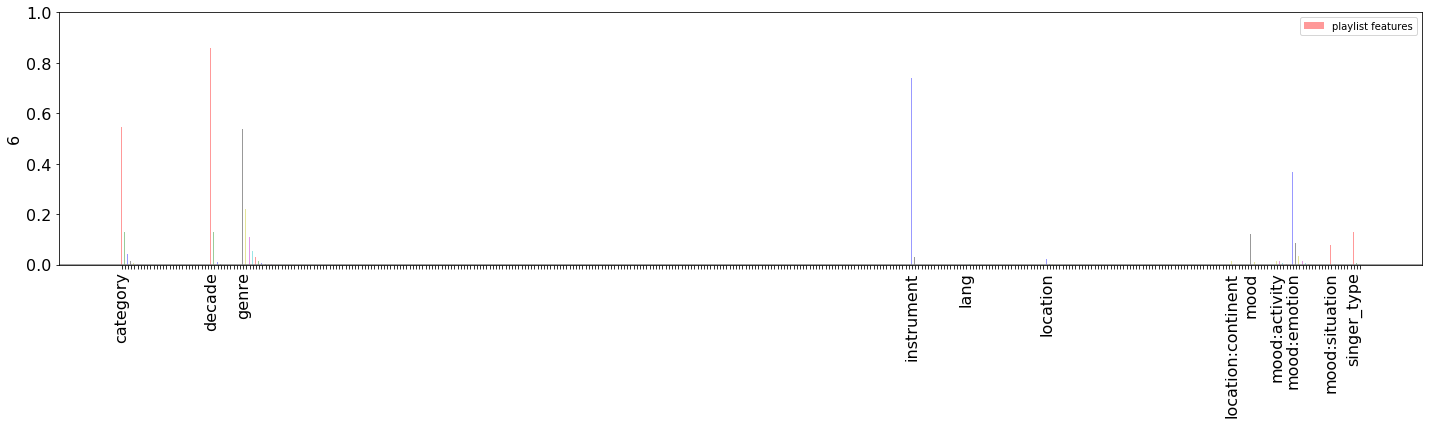

In [69]:
for c_idx in range(len(centers_ent)):
    
    x = centers_ent[c_idx]
    n_groups = 388

    
    fig, ax = plt.subplots(figsize=(20, 6))
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(16)

    index = np.arange(n_groups)
    bar_width = 0.30

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    
    rects1 = ax.bar(index, x, bar_width,
                    alpha=opacity, color='rgbkymc', 
                    error_kw=error_config,
                    label='playlist features')
    ax.axhline(0, color='gray')
    

#     ax.set_xlabel(str(c_idx))
    ax.set_ylabel(str(c_idx))
    ax.set_ylim(bottom=0, top=1)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(_feature_name_list, rotation=90)
    ax.legend()
    fig.tight_layout()
    plt.savefig('./data_pl_dzrmeta/cnt_' + str(c_idx) + '.png')


In [ ]:
'''
(28,)
(10,)
(209,)
(17,)
(25,)
(58,)
(6,)
(8,)
(5,)
(12,)
(7,)
(3,)


track_features_to_investigate = ['category', 
                                 'decade', 
                                 'genre', 
                                 'instrument',
                                 'lang',
                                 'location',
                                 'location:continent',
                                 'mood',
                                 'mood:activity',
                                 'mood:emotion',
                                 'mood:situation',
                                 'singer_type'
                                 ]
'''

In [39]:
clustered_titles_ent = [[] for _ in range(7)]
for _idx in range(len(y_kmeans_ent)):
    curr_label = y_kmeans_ent[_idx]
    clustered_titles_ent[curr_label].append(pl_Y_title_dict[str(pl_key_to_id_dict[str(_idx)])])

In [41]:
print(clustered_titles_ent[1][:50]) # High entropy for genre / mood:emotion

['bop', "1990's", 'rap', 'rock alternativo', 'alexia', 'relax', 'june', 'car', '90s baby', 'intro', 'wedding cocktail hour', 'mix tape', 'sleep', 'mood', 'sugar', 'chill', 'the playlist', 'counting crows', 'pool party', 'rock', 'bk', 'hood', 'chill jams', "just chillin'", 'beatles', 'meditate', 'sleeps', 'yacht rock', 'classics', "90's", 'band', 'throwbacks', 'chilling', 'rock', 'sleeping songs', 'smr', 'soft rock', 'flash back', '2014', 'lunes', 'gym workout', 'max', 'um', 'middle school', 'go-to', 'go to', 'mood', 'country', 'zombies', 'downtempo']


In [42]:
print(clustered_titles_ent[0][:50])

['zoned', 'rap classics', 'kendrick lamar', 'rap god', 'blackout', 'rap', 'chill out', 'issa playlist', "vibin'", 'cody', 'rap', 'the mix', 'rap', 'lit', 'pump up', "summer '16", 'beautiful', 'bruno mars', 'new2', 'kodak black', 'j cole', 'september', 'old bops', 'booty', 'lit', 'drugs', 'hip-hop', 'bumpin', 'snowboarding', 'summer', 'chill', 'spotify me', 'beast mode', 'rap', 'jesse', 'vibes', 'ash', 'paradise', 'hype', 'cool', 'praise and worship', 'rap', 'house', 'default', 'party', 'lowkey', 'bars', 'punk', 'vibes', 'lit']


In [43]:
print(clustered_titles_ent[2][:50])

['✔️', 'disneyland', 'luv', 'worship', 'chill beats', 'everyday', 'get pumped', 'phone', 'hyphy', 'eminem', 'feels', 'christmastime', 'workout', 'grind', 'raw', 'swing', 'ghetto', 'ha', 'country', 'fix you', 'the greatest', 'lit af', 'christian', 'shower', 'summer 17', 'painting', 'billy', 'praise', 'im', 'fire', '2017', 'high school', 'yaaas', 'sad song', 'holiday party', 'recent', 'hypebeast', 'lit', 'other', '⚡️', 'hype', 'friday', 'hip hop', 'sex', 'car', 'ups', 'christ', 'etc', 'turn up', 'preach']


In [45]:
for _i in range(7):
    print(clustered_titles_ent[_i][:100])
    print()

['zoned', 'rap classics', 'kendrick lamar', 'rap god', 'blackout', 'rap', 'chill out', 'issa playlist', "vibin'", 'cody', 'rap', 'the mix', 'rap', 'lit', 'pump up', "summer '16", 'beautiful', 'bruno mars', 'new2', 'kodak black', 'j cole', 'september', 'old bops', 'booty', 'lit', 'drugs', 'hip-hop', 'bumpin', 'snowboarding', 'summer', 'chill', 'spotify me', 'beast mode', 'rap', 'jesse', 'vibes', 'ash', 'paradise', 'hype', 'cool', 'praise and worship', 'rap', 'house', 'default', 'party', 'lowkey', 'bars', 'punk', 'vibes', 'lit', "90's hip hop", 'beats', 'rap', '2k17', 'whippin', 'mix', 'throwback', 'good', 'rap 2 0', 'kevin gates', 'tyler the creator', 'new favorites', 'lit playlist', 'rap', 'boom', 'turn up', 'yum', 'gym flow', 'drivin', '\U0001f98b\U0001f98b\U0001f98b', 'vietnam', 'sabotage', 'rap', 'ya know', 'hippy', 'chill', 'jam', 'turnip', '👏🏻', 'fire', 'summer 16', 'sports', 'chance', '90s', '🔥🔥', 'bpm', 'a1', 'rap', 'rap', 'rap', 'new', 'party', '💎💎💎', 'my favs', 'girl power', '

In [47]:
print(len(clustered_titles_ent[6]))

16229


In [49]:
print(clustered_titles_ent[6]) # maybe some of worship music?..

['sleep', 'new songs', 'smooth', 'art class', 'cr', 'run', 'ouch', 'musicals', 'shower', 'worship', 'rent', 'worship', 'deep thoughts', 'country', 'classical favorites', 'christian music', 'mood music', 'good music', 'sundays', 'worship', 'jack & jack', 'car', 'rock', 'airplane mode', 'worship music', 'country', 'worship', 'favorite worship', 'l o v e', 'worship', 'post rock', 'feels', 'good stuff', 'christian music', '2017 summer', 'country 1', 'worship', 'kids songs', 'funk', 'jesus', 'love', '⭐️', 'chill rap', 'grandpa', 'jesus jamz', 'country', 'les misérables the motion picture soundtrack deluxe', 'love sucks', 'chill', '4th of july', 'country ❤️', 'bryson tiller', 'christmas', 'sleep', 'christmas', 'sunset', 'pre', 'logic', 'pause', 'christmas', '☀️☀️☀️', 'jesus jams', 'country', 'les miserables', 'comedy', 'lll', 'ncs', 'trolls', 'here', 'tvd', 'god is good', 'slytherin', 'odd future', 'summer', 'christmas', 'lenny', 'country', 'nocopyrightsounds', 'aquarius', 'camp', 'jack and 

In [52]:
for _i in range(7):
    print(clustered_titles_ent[_i].count('worship'), clustered_titles_ent[_i].count('christian'))

15 14
5 4
327 284
17 19
5 8
6 8
1092 447


In [56]:
for _i in range(7):
    print(clustered_titles_ent[_i].count('rap'))

963
49
420
16
118
34
42


In [55]:
for _i in range(7):
    print(clustered_titles_ent[_i].count('party'))

207
44
98
34
107
74
11


In [58]:
for _i in range(7):
    print(clustered_titles_ent[_i].count("90's"))

12
116
6
24
57
437
4
